In [26]:
import matplotlib.pyplot as plt
from utils import patch_generator, supres_generator, Segmentation, class_generator, vectors_generator, write_to_shape
from tqdm import tqdm
# import copy

tif_10m='demo/sent2020_10m.tif'
tif_20m='demo/sent2020_20m.tif'
s1tif_20m='demo/landusing18_20_1b.tif'
# vectors="zip:///home/sgr/Загрузки/test_poly.zip"
vectors="zip://demo/test_poly.zip"
vectors="zip://demo/working_areas32635.zip"

init_params={'tif_10m':tif_10m,'tif_20m':tif_20m,'vectors':vectors,'s1tif_20m':s1tif_20m}

In [ ]:
items.sort(key=(lambda it: it['patch_10'].shape[1]*it['patch_10'].shape[2]))

In [27]:
nit=0
next_item=patch_generator(init_params)
items=[]
for i in tqdm(next_item):
    nit+=1
    items.append(i)

31334it [00:35, 873.09it/s] 


In [ ]:
next_super=supres_generator(items)
super_items=[]
for i in tqdm(range(nit)):
    super_items.append(next(next_super))

  6%|▌         | 1743/31334 [06:14<1:19:52,  6.17it/s]

In [20]:
segm_class=Segmentation(line_thresh=0.002,area_thresh=96)
next_segment=segm_class.segm_map_generator(super_items)
segment_items=[]
for i in tqdm(range(nit)):
    segment_items.append(next(next_segment))

  0%|          | 0/14 [00:00<?, ?it/s]/home/sgr/Загрузки/PIKVNZ/model/COBresolve.py:105: RuntimeWarning: invalid value encountered in true_divide
  O=(np.sum(ab*w1w2,axis=0)/np.sum((ab>0)*w1w2,axis=0)*((ind1*ind2==0)+(abs(ind1-ind2)==1))-1)*np.pi/numClusters
100%|██████████| 14/14 [00:08<00:00,  1.59it/s]


In [21]:
next_classified=class_generator(segment_items)
classified_items=[]
for i in tqdm(range(nit)):
    classified_items.append(next(next_classified))

  0%|          | 0/14 [00:00<?, ?it/s]/home/sgr/miniconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/sgr/miniconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
100%|██████████| 14/14 [00:02<00:00,  6.52it/s]


In [22]:
next_vectorized=vectors_generator(classified_items)
vectorized_items=[]
for i in tqdm(range(nit)):
    vectorized_items.append(next(next_vectorized))

100%|██████████| 14/14 [00:04<00:00,  3.42it/s]


In [23]:
write_to_shape(vectorized_items, 'trash1.shp')

In [5]:
# segm_class=Segmentation(line_thresh=0.02,area_thresh=16)
# segm_class=Segmentation(line_thresh=0.005,area_thresh=48)
segm_class=Segmentation(line_thresh=0.002,area_thresh=96)
next_segment=segm_class.segm_map_generator(super_items)
segment_items=[]
for i in range(14):
    segment_items.append(next(next_segment))

WARNING:tensorflow:5 out of the last 5 calls to <function _make_execution_function.<locals>.distributed_function at 0x0000012E060F5B88> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings is likely due to passing python objects instead of tensors. Also, tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. Please refer to https://www.tensorflow.org/tutorials/customization/performance#python_or_tensor_args and https://www.tensorflow.org/api_docs/python/tf/function for more details.

In [ ]:
from skimage.segmentation import mark_boundaries

In [8]:
import pickle
rf_model_path='./model/RF_model.pkl'
with open(rf_model_path, 'rb') as f:
    clf=pickle.load(f)
    print(clf.predict([[0,0,10,30,20,40,80,60,80,100]]))

[4]


/home/sgr/miniconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/sgr/miniconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


interactive(children=(IntSlider(value=6, description='numb', max=13), Output()), _dom_classes=('widget-interac…

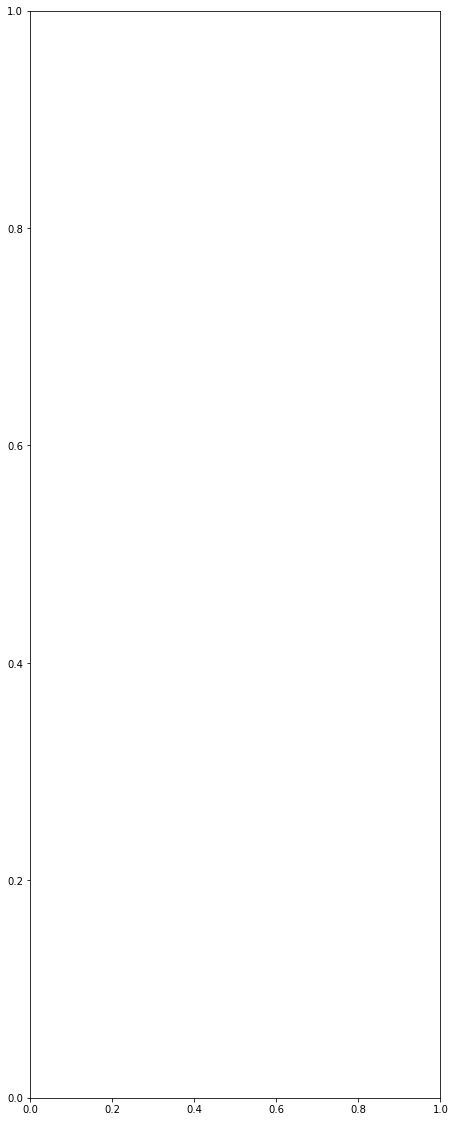

In [9]:
import numpy as np
import scipy
nm=10
param_dict=segment_items[nm]

def simple_rescale(im, scf=2):
    import numpy as np
    row,col=im.shape[0],im.shape[1]
    return np.array([[im[int(r/scf)][int(c/scf)] for c in range(col*scf)] for r in range(row*scf)])

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
@interact
def get_by_num(numb=(0,len(segment_items)-1,1)):#numb=range(14)):
    
    nm=int(numb)
    param_dict=segment_items[nm]
    segm=param_dict['segments_5']
    transf_10=param_dict['transf_10']
    transf_20=param_dict['transf_20']
    patch_10=np.rollaxis(param_dict['patch_10'],0,3)
    patch_20=np.rollaxis(param_dict['patch_20'],0,3)
    patchs1_20=param_dict['patchs1_20']


    x10,y10,_=patch_10.shape
    y_sh,x_sh=np.abs(np.array([transf_10,transf_20]).T.dot(np.array([-1,1]))[[2,5]]/10).astype(int)
    patch_20to10=simple_rescale(patch_20)[x_sh:x_sh+x10,y_sh:y_sh+y10,:]
    feat_image=simple_rescale(np.concatenate((patch_10, patch_20to10), axis=2))


    patchs1_20to10=simple_rescale(patchs1_20)[x_sh:x_sh+x10,y_sh:y_sh+y10]
    patchs1_5=simple_rescale(patchs1_20to10)    #sent1 5m patch

    remap={}
    for index in np.unique(segm.ravel()):
        if index==0: continue        
        nm_pix=len(segm[segm==index])//4
    #     nm_samples=np.ceil((np.log(nm_pix)/np.log(2))**1.6).astype(int) 
        nm_samples=nm_pix

        id_choises=np.random.choice(range(nm_pix),nm_samples,replace=False)    
#         is_candidate=(patchs1_5[segm==index].mean()+0.71).astype(int)
        is_candidate=(patchs1_5[segm==index].mean()+0.51).astype(int)
    #     is_candidate=(patchs1_5[segm==index][id_choises].mean()+0.6).astype(int)
        if not is_candidate:
            remap[index]=0
            continue   

    #     featured_items=feat_image[segm==index][id_choises]
        featured_items=feat_image[segm==index]
        cl=scipy.stats.mode(sorted(clf.predict(featured_items))).mode[0]
        remap[index]=cl
    src, values = remap.keys(), remap.values()
    d_array = np.arange(segm.max() + 1)
    d_array[list(src)] = list(values)
    class_image=d_array[segm]  

    from matplotlib.colors import LinearSegmentedColormap
    colors = [(0, 0, 0), (0.5,0.5,0.5), (0.5, 0, 0),(0, 0.5, 0), (0, 0, 0.5)]  # R -> G -> B
    n_bins = 5  # Discretizes the interpolation into bins
    cmap_name = 'my_list'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)



    plt.figure(figsize=(25,20))
    plt.subplot(1,3,1)
    plt.imshow(mark_boundaries(param_dict['rgb_5'], segm))
    plt.subplot(1,3,2)
    class_image[segm==0]=-1
    class_image[0,0]=1
    class_image[0,0]=2
    class_image[0,0]=3
    class_image[0,0]=4      
    
    plt.imshow(class_image,cmap=cm)    
    print(np.unique(class_image,return_counts=True))
    plt.subplot(1,3,3)
    x,y,b=feat_image.shape
    pix_cl_masked=clf.predict(feat_image.reshape((x*y,b))).reshape((x,y))*(patchs1_5!=0)*(segm!=0)
    pix_cl_masked[segm==0]=-1
    
    pix_cl_masked[0,0]=1
    pix_cl_masked[0,0]=2
    pix_cl_masked[0,0]=3
    pix_cl_masked[0,0]=4    
    plt.imshow(pix_cl_masked,cmap=cm)
    
    
    
    
    
    
    return class_image



In [9]:
# def get_maj(arr):
#     index, cnt=np.unique(arr,return_counts=True)
#     if len(index)==1: 
#         return index
#     else: 
#         hh=[(ind,cn) for ind,cn in zip(index, cnt)]
#         hh.sort(key=lambda x: x[1],reverse=True)
#         for key, val in hh:
#             if key>-1: return key

def simple_rescale(im, scf=2):
    import numpy as np
    class_generator
    row,col=im.shape[0],im.shape[1]
    return np.array([[im[int(r/scf)][int(c/scf)] for c in range(col*scf)] for r in range(row*scf)])

def nearest_ind(ind_neig,ind_cand):
    import numpy as np
    class_generator
    Xn=ind_neig[:,0]
    Yn=ind_neig[:,1]
    Xc=ind_cand[:,0]
    Yc=ind_cand[:,1]
    Xn=np.stack([-np.ones_like(Xn),Xn])
    Xc=np.stack([Xc, np.ones_like(Xc)])
    Xdist=Xn.T.dot(Xc)    
    Yn=np.stack([-np.ones_like(Yn),Yn])
    Yc=np.stack([Yc, np.ones_like(Yc)])
    Ydist=Yn.T.dot(Yc) 
    return np.argmin((Xdist**2+Ydist**2),axis=0)

def expand_im(im, mask_val=-1):
    import numpy as np
    from scipy.ndimage import binary_erosion
    mask=np.copy(im)
    mask[mask!=mask_val]=1
    mask[mask==mask_val]=0
    neig_mask=binary_erosion(mask)-mask
    indarr=np.indices(mask.shape)

    XYn=np.rollaxis(indarr,0,3)[neig_mask==-1]
    XYc=np.rollaxis(indarr,0,3)[mask==0]

    gg=nearest_ind(XYn,XYc)
    ccl=np.copy(im)
    ccl[XYc[:,0],XYc[:,1]]=ccl[XYn[gg][:,0],XYn[gg][:,1]]
    return ccl   

In [10]:
def class_generator(list_of_param_dict, rf_model_path='./model/RF_model.pkl'):
    import pickle
    
    import numpy as np
    import scipy
    
    with open(rf_model_path, 'rb') as f:
        clf=pickle.load(f)
    
    
    for param_dict in list_of_param_dict:        
        segm=param_dict['segments_5']
        transf_10=param_dict['transf_10']
        transf_20=param_dict['transf_20']
        patch_10=np.rollaxis(param_dict['patch_10'],0,3)
        patch_20=np.rollaxis(param_dict['patch_20'],0,3)
        patchs1_20=param_dict['patchs1_20']


        x10,y10,_=patch_10.shape
        y_sh,x_sh=np.abs(np.array([transf_10,transf_20]).T.dot(np.array([-1,1]))[[2,5]]/10).astype(int)
        patch_20to10=simple_rescale(patch_20)[x_sh:x_sh+x10,y_sh:y_sh+y10,:]
        feat_image=simple_rescale(np.concatenate((patch_10, patch_20to10), axis=2))


        patchs1_20to10=simple_rescale(patchs1_20)[x_sh:x_sh+x10,y_sh:y_sh+y10]
        patchs1_5=simple_rescale(patchs1_20to10)    #sent1 5m patch

        remap={}
        for index in np.unique(segm.ravel()):
            if index==0: continue        
            nm_pix=len(segm[segm==index])//4
        #     nm_samples=np.ceil((np.log(nm_pix)/np.log(2))**1.6).astype(int) 
            nm_samples=nm_pix
            id_choises=np.random.choice(range(nm_pix),nm_samples,replace=False)    
    #         is_candidate=(patchs1_5[segm==index].mean()+0.71).astype(int)
            is_candidate=(patchs1_5[segm==index].mean()+0.51).astype(int)
        #     is_candidate=(patchs1_5[segm==index][id_choises].mean()+0.6).astype(int)
            if not is_candidate:
                remap[index]=0
                continue   

        #     featured_items=feat_image[segm==index][id_choises]
            featured_items=feat_image[segm==index]
            cl=scipy.stats.mode(sorted(clf.predict(featured_items))).mode[0]
            remap[index]=cl
        src, values = remap.keys(), remap.values()
        d_array = np.arange(segm.max() + 1)
        d_array[list(src)] = list(values)
        class_image=d_array[segm]     
        class_image[segm==0]=-1   
        param_dict['classes']=class_image
        yield param_dict


from shapely.geometry import shape
from scipy import ndimage
import rasterio
import shapely


def vectors_generator(list_of_param_dict):
    import copy
    import numpy as np
    for param_dict in list_of_param_dict:
        cl1=expand_im(param_dict['classes']) 
        
        inshp=dict(param_dict['geojson'])        
        outline=shape(inshp['geometry'])        
        
        trans=np.array(param_dict['transf_5']).reshape((2,3))

        mypoly=[]

        for vec in rasterio.features.shapes(cl1.astype('int16')):
            multpl=vec[0]['coordinates']
            for i in range(len(multpl)):
                poly=multpl[i]
                poly=[tuple(trans.dot([x,y,1])) for x,y in poly]
                vec[0]['coordinates'][i]=poly
            shp=shape(vec[0])        
            shp=shp.intersection(outline)

            if shp.geom_type in['MultiPolygon','GeometryCollection']:
                if len(shp)==0: continue
                shps=[pol for pol in shp]
            else: shps=[shp]
            for shp in shps:
                outshp=copy.deepcopy(dict(inshp))
                outshp['properties']['class']=int(vec[1])
#                 prop= copy.deepcopy(inshp['properties'])    
#                 prop['class']=int(vec[1])
                
                outshp['geometry']= shapely.geometry.mapping(shp)
#                 outshp['properties']=prop
                mypoly.append(outshp) 

        param_dict['classed_geojson']=mypoly
        yield param_dict

In [16]:
def get_by_num0(numb):
    nm=int(numb)
    param_dict=segment_items[nm]
    segm=param_dict['segments_5']
    transf_10=param_dict['transf_10']
    transf_20=param_dict['transf_20']
    patch_10=np.rollaxis(param_dict['patch_10'],0,3)
    patch_20=np.rollaxis(param_dict['patch_20'],0,3)
    patchs1_20=param_dict['patchs1_20']


    x10,y10,_=patch_10.shape
    y_sh,x_sh=np.abs(np.array([transf_10,transf_20]).T.dot(np.array([-1,1]))[[2,5]]/10).astype(int)
    patch_20to10=simple_rescale(patch_20)[x_sh:x_sh+x10,y_sh:y_sh+y10,:]
    feat_image=simple_rescale(np.concatenate((patch_10, patch_20to10), axis=2))


    patchs1_20to10=simple_rescale(patchs1_20)[x_sh:x_sh+x10,y_sh:y_sh+y10]
    patchs1_5=simple_rescale(patchs1_20to10)    #sent1 5m patch

    remap={}
    for index in np.unique(segm.ravel()):
        if index==0: continue        
        nm_pix=len(segm[segm==index])//4
    #     nm_samples=np.ceil((np.log(nm_pix)/np.log(2))**1.6).astype(int) 
        nm_samples=nm_pix

        id_choises=np.random.choice(range(nm_pix),nm_samples,replace=False)    
#         is_candidate=(patchs1_5[segm==index].mean()+0.71).astype(int)
        is_candidate=(patchs1_5[segm==index].mean()+0.51).astype(int)
    #     is_candidate=(patchs1_5[segm==index][id_choises].mean()+0.6).astype(int)
        if not is_candidate:
            remap[index]=0
            continue   

    #     featured_items=feat_image[segm==index][id_choises]
        featured_items=feat_image[segm==index]
        cl=scipy.stats.mode(sorted(clf.predict(featured_items))).mode[0]
        remap[index]=cl
    src, values = remap.keys(), remap.values()
    d_array = np.arange(segm.max() + 1)
    d_array[list(src)] = list(values)
    class_image=d_array[segm]     
    class_image[segm==0]=-1
#     class_image[0,0]=1
#     class_image[0,1]=2
#     class_image[0,2]=3
#     class_image[0,3]=4 
    
    
    return class_image

def class_generator(list_of_param_dict):
    for param_dict in list_of_param_dict:        
        segm=param_dict['segments_5']
        transf_10=param_dict['transf_10']
        transf_20=param_dict['transf_20']
        patch_10=np.rollaxis(param_dict['patch_10'],0,3)
        patch_20=np.rollaxis(param_dict['patch_20'],0,3)
        patchs1_20=param_dict['patchs1_20']


        x10,y10,_=patch_10.shape
        y_sh,x_sh=np.abs(np.array([transf_10,transf_20]).T.dot(np.array([-1,1]))[[2,5]]/10).astype(int)
        patch_20to10=simple_rescale(patch_20)[x_sh:x_sh+x10,y_sh:y_sh+y10,:]
        feat_image=simple_rescale(np.concatenate((patch_10, patch_20to10), axis=2))


        patchs1_20to10=simple_rescale(patchs1_20)[x_sh:x_sh+x10,y_sh:y_sh+y10]
        patchs1_5=simple_rescale(patchs1_20to10)    #sent1 5m patch

        remap={}
        for index in np.unique(segm.ravel()):
            if index==0: continue        
            nm_pix=len(segm[segm==index])//4
        #     nm_samples=np.ceil((np.log(nm_pix)/np.log(2))**1.6).astype(int) 
            nm_samples=nm_pix
            id_choises=np.random.choice(range(nm_pix),nm_samples,replace=False)    
    #         is_candidate=(patchs1_5[segm==index].mean()+0.71).astype(int)
            is_candidate=(patchs1_5[segm==index].mean()+0.51).astype(int)
        #     is_candidate=(patchs1_5[segm==index][id_choises].mean()+0.6).astype(int)
            if not is_candidate:
                remap[index]=0
                continue   

        #     featured_items=feat_image[segm==index][id_choises]
            featured_items=feat_image[segm==index]
            cl=scipy.stats.mode(sorted(clf.predict(featured_items))).mode[0]
            remap[index]=cl
        src, values = remap.keys(), remap.values()
        d_array = np.arange(segm.max() + 1)
        d_array[list(src)] = list(values)
        class_image=d_array[segm]     
        class_image[segm==0]=-1   
        param_dict['classes']=class_image
        yield param_dict


from shapely.geometry import shape
from scipy import ndimage
import rasterio
import shapely


def vectors_generator(list_of_param_dict):
    import copy
    for param_dict in list_of_param_dict:
        cl1=expand_im(param_dict['classes']) 
        
        outshp=dict(param_dict['geojson'])        
        outline=shape(outshp['geometry'])        
        
        trans=np.array(param_dict['transf_5']).reshape((2,3))

        mypoly=[]

        for vec in rasterio.features.shapes(cl1.astype('int16')):
            multpl=vec[0]['coordinates']
            for i in range(len(multpl)):
                poly=multpl[i]
                poly=[tuple(trans.dot([x,y,1])) for x,y in poly]
                vec[0]['coordinates'][i]=poly
            shp=shape(vec[0])        
            shp=shp.intersection(outline)

            if shp.geom_type in['MultiPolygon','GeometryCollection']:
                if len(shp)==0: continue
                shps=[pol for pol in shp]
            else: shps=[shp]
            for shp in shps:
#                 outshp=dict(param_dict['geojson'])
                prop= copy.deepcopy(outshp['properties'])    
                prop['class']=int(vec[1])
                outshp['geometry']= shapely.geometry.mapping(shp)
                outshp['properties']=prop
                mypoly.append(outshp) 

        param_dict['classed_geojson']=mypoly
        yield param_dict





@interact
def rr(nm=(0,len(segment_items)-1,1)):

# nm=3
    cl=get_by_num0(nm)

    
    cl1=expand_im(cl)
    
#     cl1=ndimage.generic_filter(cl,get_maj,3)
#     cl1=ndimage.generic_filter(cl1,get_maj,3)

    outline=shape(segment_items[nm]['geojson']['geometry'])
    trans=np.array(segment_items[nm]['transf_5']).reshape((2,3))

    mypoly=[]
    mpl=[]

    import copy
    # import collections

    for vec in rasterio.features.shapes(cl1.astype('int16')):
        multpl=vec[0]['coordinates']
        for i in range(len(multpl)):
            poly=multpl[i]
            poly=[tuple(trans.dot([x,y,1])) for x,y in poly]

            vec[0]['coordinates'][i]=poly

        shp=shape(vec[0])        
        shp=shp.intersection(outline)
        
#         mpl.append(shp)

    #         if shp.geom_type =='Polygon': 

        if shp.geom_type in['MultiPolygon','GeometryCollection']:
            if len(shp)==0: continue
            shps=[pol for pol in shp]
        else: shps=[shp]
#             area=[pol.area  for pol in  shp]
#             shp=shp[np.argmax(area)]
        for shp in shps:
            outshp=dict(segment_items[nm]['geojson'])
            prop= copy.deepcopy(outshp['properties'])    
            prop['class']=int(vec[1])
            outshp['geometry']= shapely.geometry.mapping(shp)
            outshp['properties']=prop

            mypoly.append(outshp) 


#     colr={-1:'k',0:'#555555',1:'g',2:'c',3:'b',4:'r'}

    colr={ 0:'#8B4513',\
        1: '#ADFF2F',\
        2: '#32CD32',\
        3: '#006400',\
        4: '#113300'}
#     5: '#774422'}
    
    
    # pol=mypoly[4]
    plt.figure(figsize=(18,10))
    plt.axis('equal')
    plt.subplot(1,2,1)
    for pol in mypoly:
        geom=shape(pol['geometry'])
        col=int(pol['properties']['class'])        
        plt.fill(*geom.exterior.xy,color=colr[col])
        for i in geom.interiors:
            plt.fill(*i.xy,'w')
    plt.axis('equal')
    plt.subplot(1,2,2)
    plt.imshow(cl)



interactive(children=(IntSlider(value=6, description='nm', max=13), Output()), _dom_classes=('widget-interact'…

# МУЛЬТИПОЛИГОННОСТЬ И ДЫРЯВОСТЬ!!! (3,8 номер)

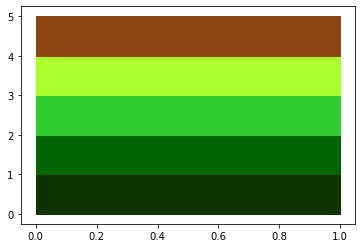

In [286]:
colr={ 0:'#8B4513',\
        1: '#ADFF2F',\
        2: '#32CD32',\
        3: '#006400',\
        4: '#113300'}
bx,by=np.array([[0,0,1,1,0],[0,1,1,0,0]])

for ind in range(5):
    plt.fill(bx,by+ind,color=colr[4-ind])
#     plt.fill(bx,by+1,color=colr[1])

In [382]:
with fiona.open('test_uk.shp', 'w',**uu.meta) as sink:
    for f in polygs:    
        sink.write(f)

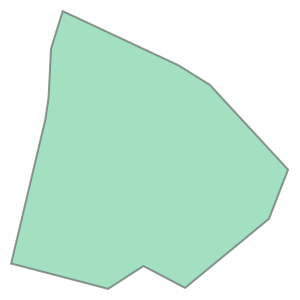

In [380]:
shape(vectorized_items[5]['classed_geojson'][0]['geometry'])

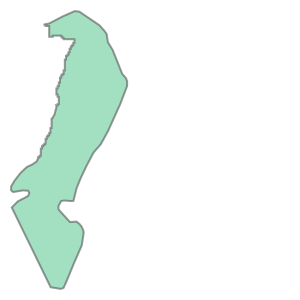

In [365]:
shape(polygs[40]['geometry'])

In [381]:
polygs=[item for dct in vectorized_items for item in dct['classed_geojson']]

In [351]:
uu.meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('FID', 'int:10')]),
  'geometry': 'Polygon'},
 'crs': {'init': 'epsg:32635'},
 'crs_wkt': 'PROJCS["WGS 84 / UTM zone 35N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32635"]]'}

In [353]:
uu.meta['schema']['properties']['class']='int:10'

In [388]:
uu.meta

{'driver': 'ESRI Shapefile',
 'schema': {'properties': OrderedDict([('FID', 'int:10'),
               ('class', 'int:10')]),
  'geometry': 'Polygon'},
 'crs': {'init': 'epsg:32635'},
 'crs_wkt': 'PROJCS["WGS 84 / UTM zone 35N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32635"]]'}

In [355]:
polygs[4]

{'type': 'Feature',
 'id': '3',
 'properties': OrderedDict([('FID', None), ('class', 0)]),
 'geometry': {'type': 'Polygon',
  'coordinates': (((727519.0338758396, 6151875.0),
    (727520.0, 6151875.0),
    (727525.0, 6151875.0),
    (727525.0, 6151880.0),
    (727530.0, 6151880.0),
    (727530.0, 6151910.0),
    (727525.0, 6151910.0),
    (727525.0, 6151920.0),
    (727520.0, 6151920.0),
    (727520.0, 6151945.0),
    (727525.0, 6151945.0),
    (727525.0, 6151955.0),
    (727530.0, 6151955.0),
    (727530.0, 6151970.0),
    (727535.0, 6151970.0),
    (727535.0, 6151990.0),
    (727540.0, 6151990.0),
    (727540.0, 6152000.0),
    (727545.0, 6152000.0),
    (727545.0, 6152005.0),
    (727550.0, 6152005.0),
    (727550.0, 6152020.0),
    (727555.0, 6152020.0),
    (727555.0, 6152065.0),
    (727560.0, 6152065.0),
    (727560.0, 6152080.0),
    (727565.0, 6152080.0),
    (727565.0, 6152085.0),
    (727570.0, 6152085.0),
    (727570.0, 6152095.0),
    (727575.0, 6152095.0),
    (727575.0, 

In [350]:
opt=copy(polygs[4]['properties'])

OrderedDict([('FID', None), ('class', 0)])

In [349]:
polygs[4]

{'type': 'Feature',
 'id': '3',
 'properties': OrderedDict([('FID', None), ('class', 0)]),
 'geometry': {'type': 'Polygon',
  'coordinates': (((727519.0338758396, 6151875.0),
    (727520.0, 6151875.0),
    (727525.0, 6151875.0),
    (727525.0, 6151880.0),
    (727530.0, 6151880.0),
    (727530.0, 6151910.0),
    (727525.0, 6151910.0),
    (727525.0, 6151920.0),
    (727520.0, 6151920.0),
    (727520.0, 6151945.0),
    (727525.0, 6151945.0),
    (727525.0, 6151955.0),
    (727530.0, 6151955.0),
    (727530.0, 6151970.0),
    (727535.0, 6151970.0),
    (727535.0, 6151990.0),
    (727540.0, 6151990.0),
    (727540.0, 6152000.0),
    (727545.0, 6152000.0),
    (727545.0, 6152005.0),
    (727550.0, 6152005.0),
    (727550.0, 6152020.0),
    (727555.0, 6152020.0),
    (727555.0, 6152065.0),
    (727560.0, 6152065.0),
    (727560.0, 6152080.0),
    (727565.0, 6152080.0),
    (727565.0, 6152085.0),
    (727570.0, 6152085.0),
    (727570.0, 6152095.0),
    (727575.0, 6152095.0),
    (727575.0, 

In [289]:
import fiona
uu=fiona.open(vectors, layer=0)

In [292]:
uu.close()

In [303]:
mt['schema']['properties']

OrderedDict([('FID', 'int:10')])

In [305]:
mypoly[0]['properties']['FID']='int:10'
mypoly[0]['properties']['class']='int:10'

In [307]:
mypoly[1]

{'type': 'Feature',
 'id': '3',
 'properties': OrderedDict([('FID', None), ('class', 0)]),
 'geometry': {'type': 'Polygon',
  'coordinates': (((727519.0338758396, 6151875.0),
    (727520.0, 6151875.0),
    (727525.0, 6151875.0),
    (727525.0, 6151880.0),
    (727530.0, 6151880.0),
    (727530.0, 6151910.0),
    (727525.0, 6151910.0),
    (727525.0, 6151920.0),
    (727520.0, 6151920.0),
    (727520.0, 6151945.0),
    (727525.0, 6151945.0),
    (727525.0, 6151955.0),
    (727530.0, 6151955.0),
    (727530.0, 6151970.0),
    (727535.0, 6151970.0),
    (727535.0, 6151990.0),
    (727540.0, 6151990.0),
    (727540.0, 6152000.0),
    (727545.0, 6152000.0),
    (727545.0, 6152005.0),
    (727550.0, 6152005.0),
    (727550.0, 6152020.0),
    (727555.0, 6152020.0),
    (727555.0, 6152065.0),
    (727560.0, 6152065.0),
    (727560.0, 6152080.0),
    (727565.0, 6152080.0),
    (727565.0, 6152085.0),
    (727570.0, 6152085.0),
    (727570.0, 6152095.0),
    (727575.0, 6152095.0),
    (727575.0, 

In [188]:
import copy

nm=3
cl=get_by_num0(nm)
cl1=expand_im(cl)
outline=shape(segment_items[nm]['geojson']['geometry'])
trans=np.array(segment_items[nm]['transf_5']).reshape((2,3))
mypoly=[]
mpl=[]

for vec in rasterio.features.shapes(cl1.astype('int16')):
    multpl=vec[0]['coordinates']
    for i in range(len(multpl)):
        poly=multpl[i]
        poly=[tuple(trans.dot([x,y,1])) for x,y in poly]

        vec[0]['coordinates'][i]=poly

    shp=shape(vec[0])        
    shp=shp.intersection(outline)
    mpl.append(shp)

#         if shp.geom_type =='Polygon': 

#     print(shp.geom_type)
    if shp.geom_type in ['MultiPolygon','GeometryCollection']:
        if len(shp)==0: continue
        shps=[pol for pol in shp]
    else: shps=[shp]
        
    for i in shps:

        outshp=dict(segment_items[nm]['geojson'])

        prop= copy.deepcopy(outshp['properties'])    
        prop['class']=int(vec[1])
        outshp['geometry']= shapely.geometry.mapping(i)
        outshp['properties']=prop

        mypoly.append(outshp)

Polygon
Polygon
Polygon


In [216]:
for i in shape(mypoly[2]['geometry']).interiors:
    print(1)

1
1


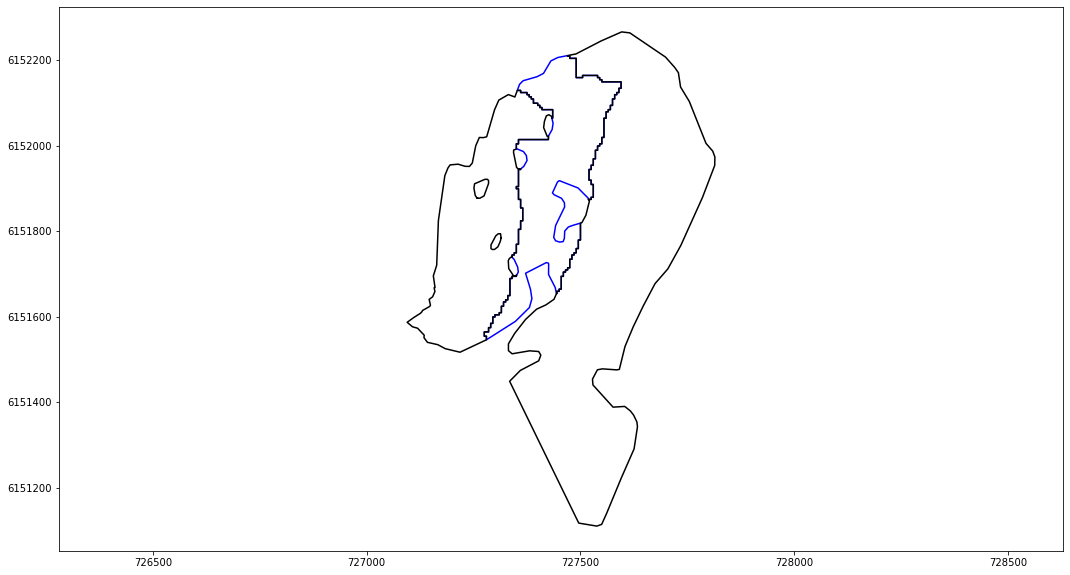

In [223]:
colr={-1:'k',0:'k',1:'g',2:'c',3:'b',4:'r'}
plt.figure(figsize=(18,10))
plt.axis('equal')
for pol in mypoly:
    geom=shape(pol['geometry'])
    col=int(pol['properties']['class'])        
    plt.plot(*geom.exterior.xy,colr[col])
    for i in geom.interiors:
        plt.plot(*i.xy,colr[col])

In [16]:
seg=segment_items[3]['segments_5']
clss=get_by_num0(3)

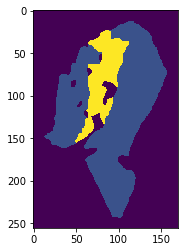

In [19]:
plt.imshow(clss)

In [138]:
def nearest_ind(ind_neig,ind_cand):
    Xn=ind_neig[:,0]
    Yn=ind_neig[:,1]
    Xc=ind_cand[:,0]
    Yc=ind_cand[:,1]
    Xn=np.stack([-np.ones_like(Xn),Xn])
    Xc=np.stack([Xc, np.ones_like(Xc)])
    Xdist=Xn.T.dot(Xc)    
    Yn=np.stack([-np.ones_like(Yn),Yn])
    Yc=np.stack([Yc, np.ones_like(Yc)])
    Ydist=Yn.T.dot(Yc) 
    return np.argmin((Xdist**2+Ydist**2),axis=0)

def expand_im(im, mask_val=-1):
    from scipy.ndimage import binary_erosion
    mask=np.copy(im)
    mask[mask!=mask_val]=1
    mask[mask==mask_val]=0
    neig_mask=binary_erosion(mask)-mask
    indarr=np.indices(mask.shape)

    XYn=np.rollaxis(indarr,0,3)[neig_mask==-1]
    XYc=np.rollaxis(indarr,0,3)[mask==0]

    gg=nearest_ind(XYn,XYc)
    ccl=np.copy(im)
    ccl[XYc[:,0],XYc[:,1]]=ccl[XYn[gg][:,0],XYn[gg][:,1]]
    return ccl

# plt.imshow(mask)

In [137]:
%%timeit
expand_im(seg, mask_val=0)

284 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


(857, 2) (857,)


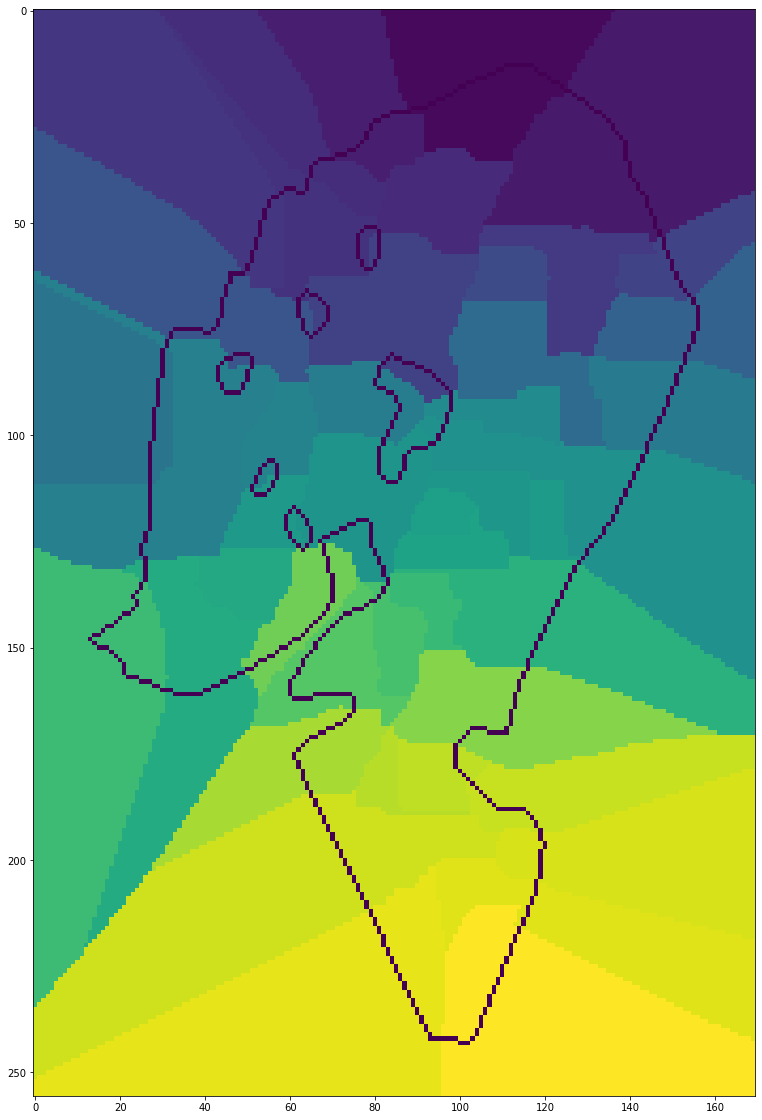

In [133]:

mask=np.copy(seg)
mask[mask!=0]=1
mask[mask==0]=0
mask=binary_erosion(mask)-mask


exp_im=expand_im(seg, mask_val=0)
exp_im[mask==-1]=-1
plt.figure(figsize=(20,20))
plt.imshow(exp_im)


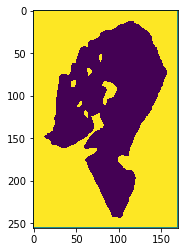

In [132]:
plt.imshow(mask)

In [109]:
XYc.shape

(27024, 2)

In [118]:
ccl=np.copy(clss)
ccl[XYc[:,0],XYc[:,1]]=ccl[XYn[gg][:,0],XYn[gg][:,1]]

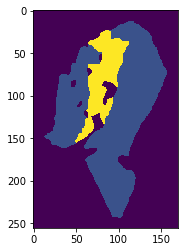

In [120]:
plt.imshow(clss)

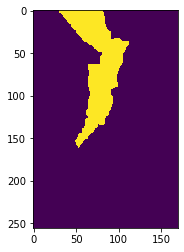

In [119]:
plt.imshow(ccl)

In [112]:
XYn[gg].shape


# clss[XYc[:,0],XYc[:,1]]

(27024, 2)

In [90]:
nearest_ind(XYn,XYc)

(857, 2) (857,)


array([104, 104, 104, ..., 817, 817, 817])

In [81]:
nearest_ind([[1,2],[5,6],[0,2]],[[4,5],[6.5,4],[6.5,9],[8.9,7]])

(2, 2)


array([1, 1])

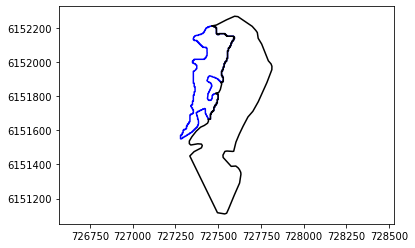

In [405]:
colr={-1:'k',0:'k',1:'g',2:'c',3:'b',4:'r'}
plt.axis('equal')
# pol=mypoly[4]
for pol in mypoly:
    geom=shape(pol['geometry'])
    col=int(pol['properties']['class'])
    
    plt.plot(*geom.exterior.xy,colr[col])

Text(0.5, 1.0, '(109, 85, 6)')

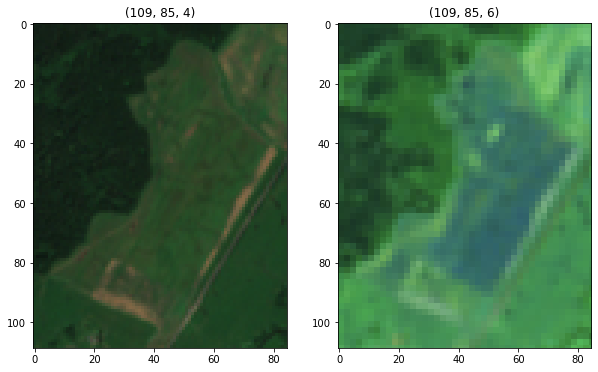

In [316]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(p10[:,:,[2,1,0]]/2500)
plt.title(p10.shape)
plt.subplot(1,2,2)
plt.imshow(p20_res[:,:,[5,4,0]]/3000)
plt.title(p20_res.shape)

In [203]:
v=np.array([1,5,2])
scale(p20,2)[10,50,:],p20[5,25,:]

(array([ 935, 3065, 3923, 4107, 1788,  815], dtype=uint16),
 array([ 935, 3065, 3923, 4107, 1788,  815], dtype=uint16))